Dataset Preview:
         Date       Day  SKU City  Volume       BU  Brand       Model  \
0  01-04-2021  Thursday  M01    C      15  Mobiles  RealU       RU-10   
1  01-04-2021  Thursday  M02    C      10  Mobiles  RealU   RU-9 Plus   
2  01-04-2021  Thursday  M03    C       7  Mobiles   YouM       YM-99   
3  01-04-2021  Thursday  M04    C       6  Mobiles   YouM  YM-99 Plus   
4  01-04-2021  Thursday  M05    C       3  Mobiles   YouM      YM-98    

   Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      12100             181500          11.654820     21153.498820   
1      10100             101000          11.560498     11676.102961   
2      16100             112700           9.456886     10657.910157   
3      20100             120600           6.935385      8364.074702   
4       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.

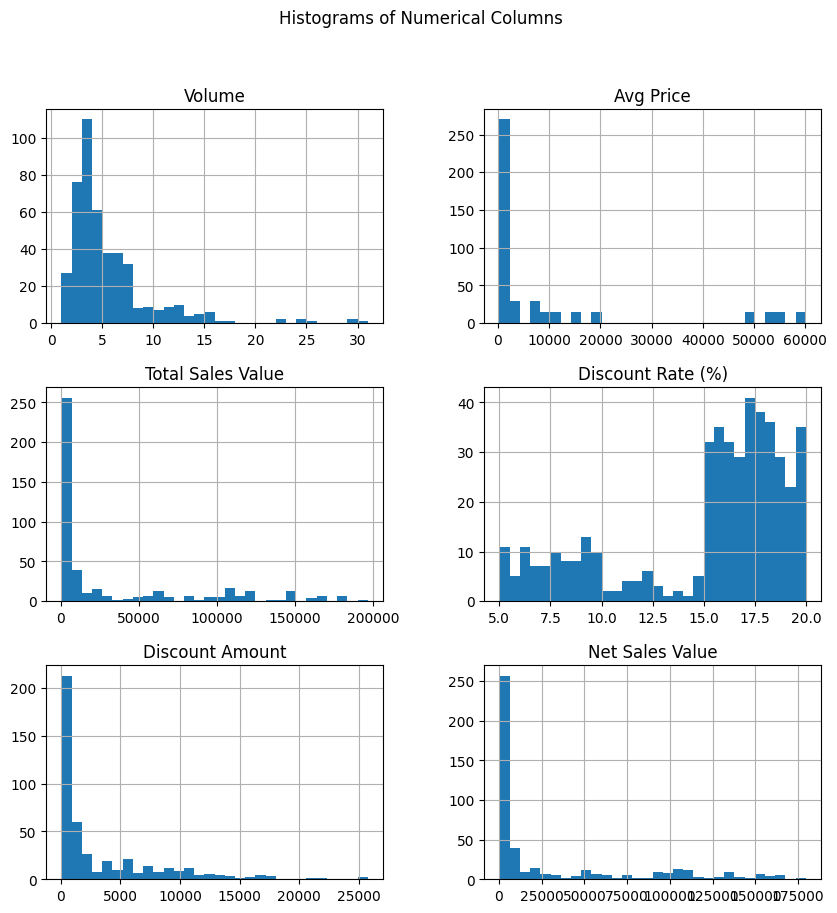


Plotting Boxplots for Numerical Columns...


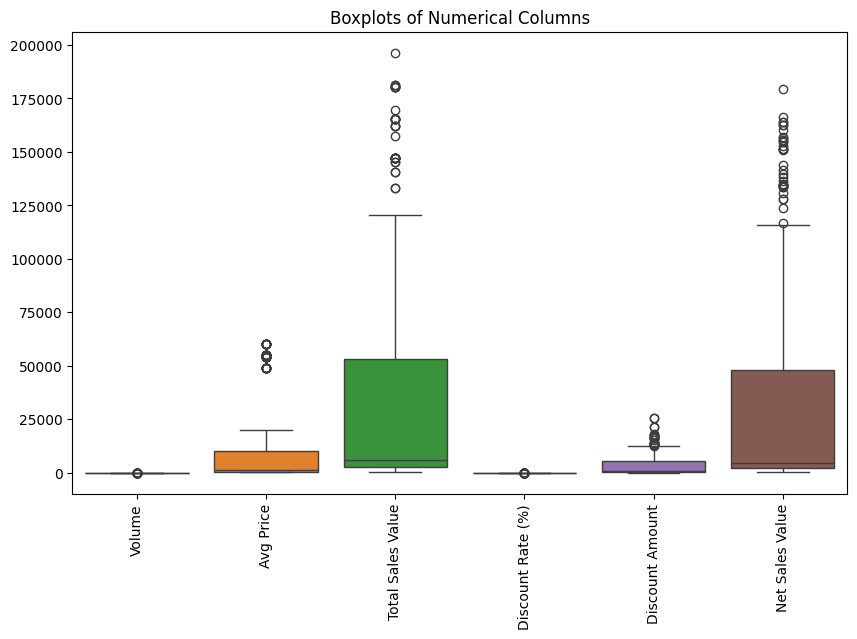


Categorical Columns: ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

Plotting Bar Charts for Categorical Columns...


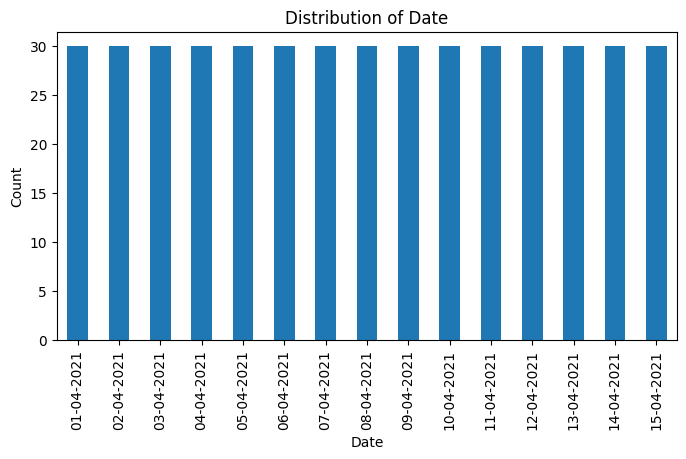

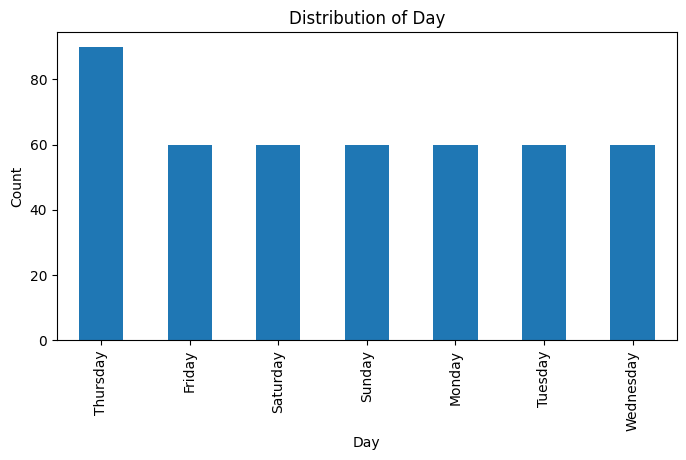

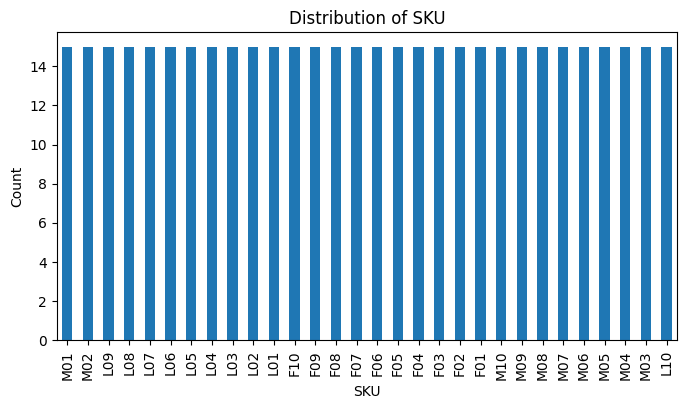

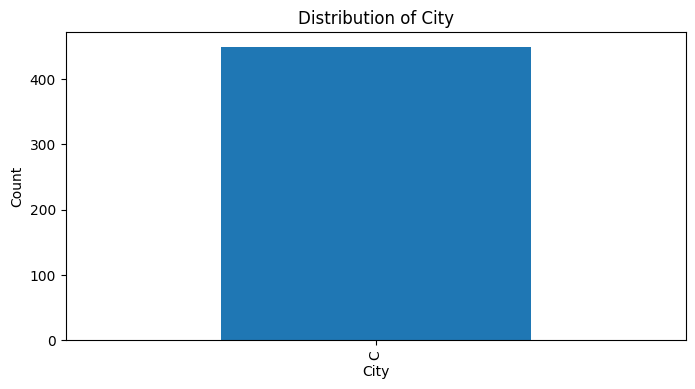

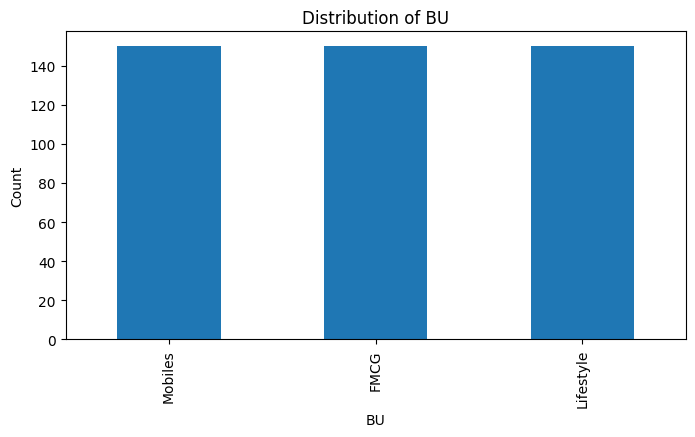

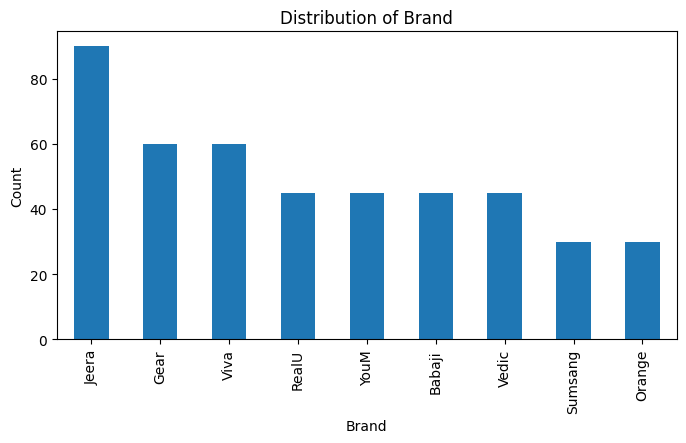

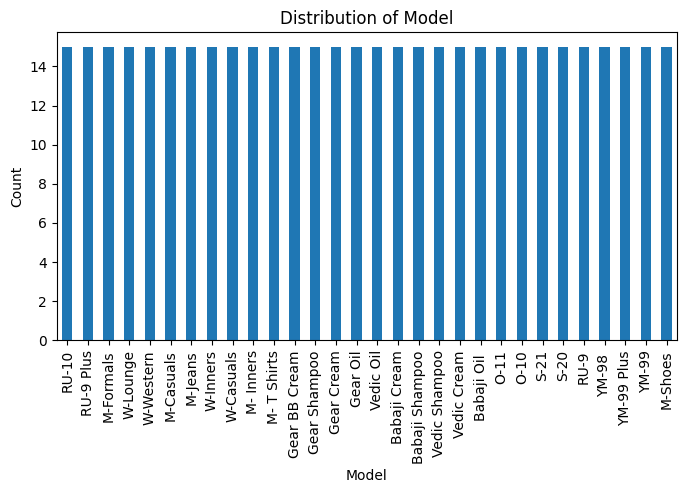


Standardization (Z-score Normalization) in progress...

Before Standardization (First 5 rows of Numerical Columns):
   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  

After Standardization (First 5 rows of Numerical Columns):
     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661

In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
# Replace 'sales_data_with_discounts.csv.csv' with your actual dataset file path
df = pd.read_csv('sales_data_with_discounts.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

# Step 2: Descriptive Analytics for Numerical Columns
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("\nNumerical Columns:", list(numerical_cols))

# Calculate mean, median, mode, and standard deviation for numerical columns
stats = df[numerical_cols].agg(['mean', 'median', 'std', lambda x: x.mode()[0]])
stats.rename(index={'<lambda>': 'mode'}, inplace=True)

# Display the calculated statistics
print("\nStatistical Summary of Numerical Columns:")
print(stats)

# Step 3: Data Visualization
# Histograms for Numerical Columns
print("\nPlotting Histograms for Numerical Columns...")
df[numerical_cols].hist(figsize=(10, 10), bins=30, layout=(len(numerical_cols)//2, 2))
plt.suptitle("Histograms of Numerical Columns")
plt.show()

# Boxplots for Numerical Columns
print("\nPlotting Boxplots for Numerical Columns...")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=90)
plt.title("Boxplots of Numerical Columns")
plt.show()

# Step 4: Bar Chart Analysis for Categorical Columns
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:", list(categorical_cols))

# Plot bar charts for categorical columns
print("\nPlotting Bar Charts for Categorical Columns...")
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')
    plt.show()

# Step 5: Standardization of Numerical Variables
# Explain standardization
print("\nStandardization (Z-score Normalization) in progress...")

# Standardize numerical columns using Z-score normalization
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display before and after comparison for numerical columns
print("\nBefore Standardization (First 5 rows of Numerical Columns):")
print(df[numerical_cols].head())

print("\nAfter Standardization (First 5 rows of Numerical Columns):")
print(df_standardized[numerical_cols].head())

# Step 6: Conversion of Categorical Data into Dummy Variables (One-hot Encoding)
# Discuss why one-hot encoding is necessary
print("\nConverting Categorical Data into Dummy Variables using One-hot Encoding...")

# Apply one-hot encoding to categorical columns
df_dummies = pd.get_dummies(df_standardized, columns=categorical_cols, drop_first=True)

# Display a portion of the transformed dataset
print("\nTransformed Dataset Preview (After One-hot Encoding):")
print(df_dummies.head())

# Saving the processed dataset for future use (optional)
df_dummies.to_csv('sales_discounts_processed.csv', index=False)
print("\nProcessed dataset saved as 'sales_discounts_processed.csv'.")
